In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

np.random.seed(101)
tf.random.set_seed(1001)

Etapa 2: Importação Base

In [6]:
casas = pd.read_csv("https://raw.githubusercontent.com/Jeferson-Peter/MLs07a-kc_house_data/master/MLs07a%20kc_house_data.csv")
casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Vamos ver como o preço da casa está mudando no tempo

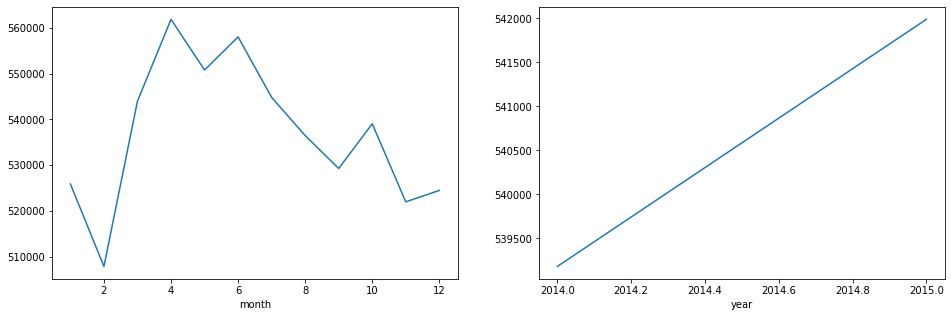

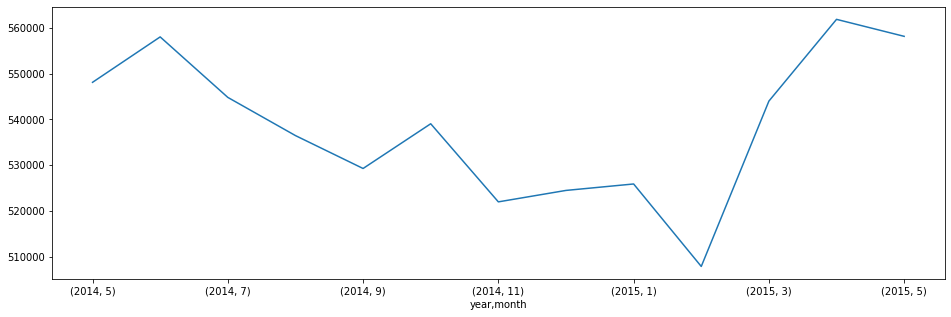

In [8]:
casas['date'] = pd.to_datetime(casas['date'])
casas['month'] = casas['date'].apply(lambda date:date.month)
casas['year'] = casas['date'].apply(lambda date:date.year)

fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
casas.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
casas.groupby('year').mean()['price'].plot()

fig2 = plt.figure(figsize=(16,5))
casas.groupby(['year', 'month']).mean()['price'].plot()

In [ ]:
#feature, coluna, caracteristicas



vamos remover as colunas desnecessárias, visto baixa relação do tempo

In [9]:
# não é passivel de generalização e pode atrapalhar o treinamento 
casas = casas.drop(labels=['id', 'date'], axis=1)
casas.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [10]:
matrix_corr = casas.corr() #matrix de correlação
#Maior correlação com o preço
print(matrix_corr['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
zipcode         -0.053203
Name: price, dtype: float64


In [11]:
casas = casas.drop(labels=['zipcode', 'year', 'month'], axis=1)
casas

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


Etapa 4: visualização da base de dados

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local

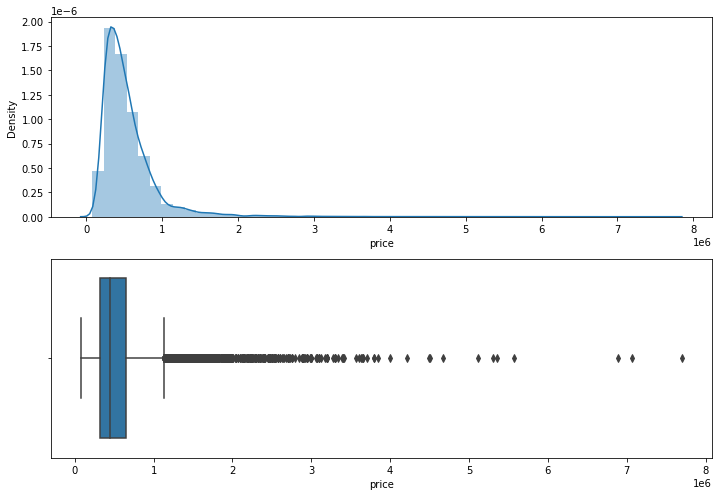

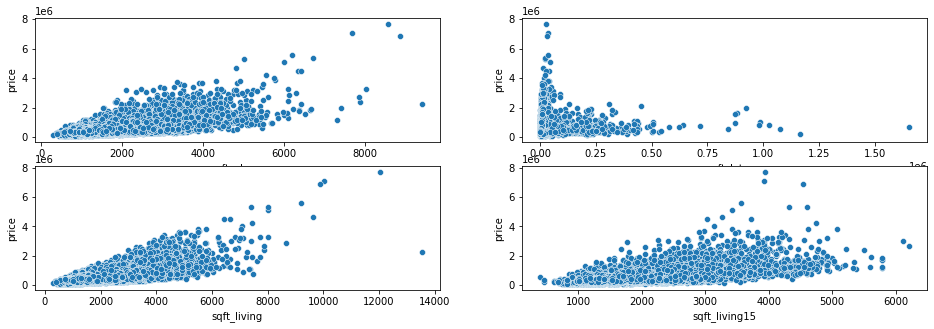

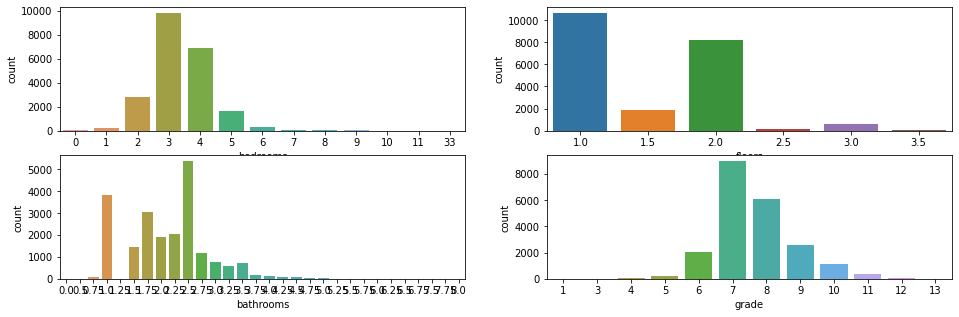

In [18]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(casas['price'])

fig.add_subplot(2,1,2)
sns.boxplot(casas['price'])
plt.tight_layout()

# Visualizando metragem quadrada de (casa, lote, acima, porão)
# é bastante útil ter uma visão geral rápida da distribuição de diferentes recursos (features) versus

fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(casas['sqft_above'], casas['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(casas['sqft_lot'], casas['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(casas['sqft_living'], casas['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(casas['sqft_living15'], casas['price'])

fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.countplot(casas['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(casas['floors'])
fig.add_subplot(2,2,3)
sns.countplot(casas['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(casas['grade'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbc02f6550>,
      dtype=object)

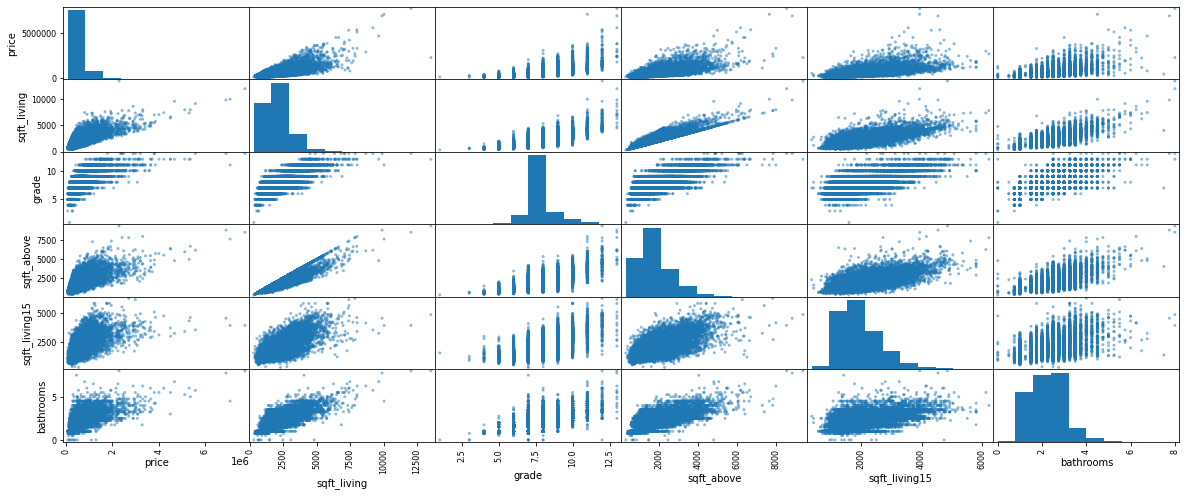

In [17]:
attr = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
pd.plotting.scatter_matrix(casas[attr], figsize=(20,8))

          price  sqft_living  grade  sqft_above  sqft_living15  bathrooms
0      221900.0         1180      7        1180           1340       1.00
1      538000.0         2570      7        2170           1690       2.25
2      180000.0          770      6         770           2720       1.00
3      604000.0         1960      7        1050           1360       3.00
4      510000.0         1680      8        1680           1800       2.00
...         ...          ...    ...         ...            ...        ...
21608  360000.0         1530      8        1530           1530       2.50
21609  400000.0         2310      8        2310           1830       2.50
21610  402101.0         1020      7        1020           1020       0.75
21611  400000.0         1600      8        1600           1410       2.50
21612  325000.0         1020      7        1020           1020       0.75

[21613 rows x 6 columns]


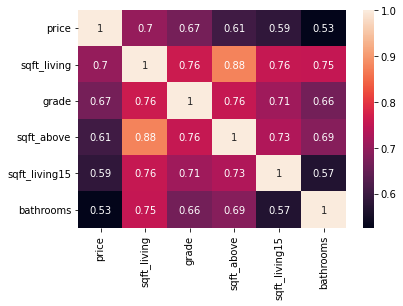

In [19]:
features = casas[attr]
print(features)
sns.heatmap(features.corr(), annot=True)

tratamento da base de dados

In [20]:
Y = features.iloc[:,:1].values # pegar apenas o ultimo valor(cnt)
Y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [21]:
# X = features.iloc[:,1:].values # pegar todos os valores menos o último (cnt)
X = casas.drop('price', axis=1).values 
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [22]:
#Configuração da base de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [23]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(float))
X_test = s_scaler.transform(X_test.astype(float))

Etapa 7: Construção e treinamento do modelo


In [24]:
number_of_features = X.shape[1]
number_of_features

17

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(number_of_features, activation='relu', input_shape=(number_of_features,)))
model.add(Dense(number_of_features, activation='relu'))
model.add(Dense(number_of_features, activation='relu'))
model.add(Dense(number_of_features, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 17)                306       
                                                                 
 dense_6 (Dense)             (None, 17)                306       
                                                                 
 dense_7 (Dense)             (None, 17)                306       
                                                                 
 dense_8 (Dense)             (None, 17)                306       
                                                                 
 dense_9 (Dense)             (None, 1)                 18        
                                                                 
Total params: 1,242
Trainable params: 1,242
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = model.fit(x = X_train, y = Y_train, 
                        validation_data=(X_test, Y_test), #percentual, aqui estamos usando a mesma base para teste, e validação
                        batch_size=128, epochs=50) #que tal deixar com 400

Epoch 1/50
114/114 [==============================] - 1s 5ms/step - loss: 425273425920.0000 - val_loss: 428841336832.0000
Epoch 2/50
114/114 [==============================] - 0s 3ms/step - loss: 424522940416.0000 - val_loss: 425980231680.0000
Epoch 3/50
114/114 [==============================] - 0s 4ms/step - loss: 412239822848.0000 - val_loss: 395528634368.0000
Epoch 4/50
114/114 [==============================] - 0s 3ms/step - loss: 345562120192.0000 - val_loss: 279482466304.0000
Epoch 5/50
  1/114 [..............................] - ETA: 1s - loss: 262067912704.0000

KeyboardInterrupt: ignored

Text(0, 0.5, 'Training and Validation Loss')

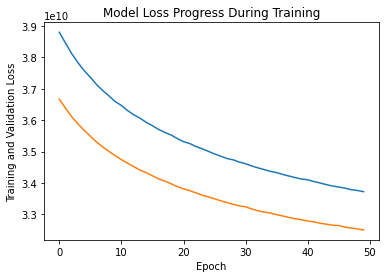

In [33]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss') #ainda pode ser treinamento, pois a reta final em baixo não está reta, o modelo ainda pode aprender

In [46]:
model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = model.fit(x = X_train, y = Y_train, 
                        validation_data=(X_test, Y_test), #percentual, aqui estamos usando a mesma base para teste, e validação
                        batch_size=128, epochs=400) #que tal deixar com 400

Epoch 1/400
114/114 [==============================] - 1s 5ms/step - loss: 241136959488.0000 - val_loss: 200041185280.0000
Epoch 2/400
114/114 [==============================] - 0s 4ms/step - loss: 162803826688.0000 - val_loss: 122514055168.0000
Epoch 3/400
114/114 [==============================] - 1s 5ms/step - loss: 103965081600.0000 - val_loss: 83379511296.0000
Epoch 4/400
114/114 [==============================] - 0s 4ms/step - loss: 81611866112.0000 - val_loss: 72973107200.0000
Epoch 5/400
114/114 [==============================] - 0s 4ms/step - loss: 75056136192.0000 - val_loss: 68982718464.0000
Epoch 6/400
114/114 [==============================] - 0s 3ms/step - loss: 71519911936.0000 - val_loss: 66093006848.0000
Epoch 7/400
114/114 [==============================] - 0s 4ms/step - loss: 68507095040.0000 - val_loss: 63473614848.0000
Epoch 8/400
114/114 [==============================] - 0s 3ms/step - loss: 65875312640.0000 - val_loss: 61189386240.0000
Epoch 9/400
114/114 [======

In [48]:
Y_predict = model.predict(X_test)
Y_predict

array([[474300.44],
       [565451.7 ],
       [545730.9 ],
       ...,
       [305314.38],
       [500168.9 ],
       [597606.7 ]], dtype=float32)

Text(0, 0.5, 'True Values')

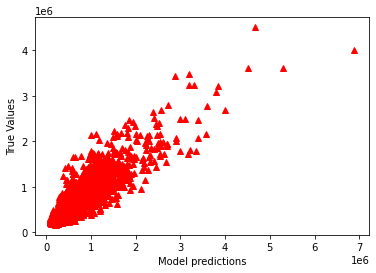

In [47]:
plt.plot(Y_test, Y_predict, "^", color='r')
plt.xlabel('Model predictions')
plt.ylabel('True Values')

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,\
 mean_absolute_percentage_error, explained_variance_score
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(r2_ajustado)
variance = explained_variance_score(Y_test, Y_predict)

print(f"""
        mae: {mae},\n
        mse: {mse}, \n
        rmse: {rmse}, \n
        mape: {mape}, \n
        varScore:{variance},\n
        r2: {r2}, \n
        r2 ajustado: {r2_ajustado}\n""")

print("mape: {:.2%}".format(mape))
print("varScore: {:.2%}".format(variance))
print("r2: {:.2%}".format(r2))
print("r2_ajustado: {:.2%}".format(r2_ajustado))

0.8008710354265344

        mae: 102931.19860157017,

        mse: 27244989798.725887, 

        rmse: 165060.56403249654, 

        mape: 0.20161920378639742, 

        varScore:0.8020794026677203,

        r2: 0.8013456838277891, 

        r2 ajustado: 0.8008710354265344

mape: 20.16%
varScore: 80.21%
r2: 80.13%
r2_ajustado: 80.09%
